# **Project Business Statistics: E-news Express**

## **<u>Context</u>**

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in `abtest.csv`. Perform the statistical analysis to answer the following questions using the collected data

### Objective

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

* Explore the dataset and extract insights using Exploratory Data Analysis.
* Do the users spend more time on the new landing page than the old landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language? 
* Is the average time spent on the new page same for the different language users?

Consider a significance level of 0.05 for all tests. 

### Data Description

The data contains the different data related to users in two different landing pages. The detailed data dictionary is given below.

### Data Dictionary

* `user_id` - This represents the user ID of the person visiting the website.
* `group` - This represents whether the user belongs to the first group (control) or the second group (treatment).
* `landing_page` - This represents whether the landing page is new or old.
* `time_spent_on_the_page` - This represents the time (in minutes) spent by the user on the landing page.
* `converted` - This represents whether the user gets converted to a subscriber of the news portal or not.
* `language_preferred` - This represents the language chosen by the user to view the landing page.

 Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import library for data statistical analysis and inference
import scipy.stats as stats

# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

## **<u>Understanding the structure of the data</u>**

In [2]:
# read the data
df = pd.read_csv('abtest.csv')
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observations:

The DataFrame has 6 columns as mentioned in the Data Dictionary. Data in each row corresponds to the user activity on the landing page (new or old).

In [3]:
# 'df.shape' will return a list with 2 values: first one is the number of rows at the dataset
# and the second value is the number of columns on the dataset
df.shape

(100, 6)

#### Observations:
* Dataset contains 100 observations and 9 features.

In [4]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:
* Based on .info() method it's possible to observe that for each row there exists:
    * 1 integer feature
    * 1 float point feature and 
    * 4 string features
* As we do not have information about the customer but just the 'customer_id' on the dataset, it's possible to conclude that the 'customer_id' feature is a foreign-key.
* As noticed in df.shape the dataset has 100 registers and as we can see after df.info() none of the features has null values because every feature has the same value counts as the total register (100).

 The dataset contains `object` feature type which can be converted to `categorical` data type 

In [5]:
# converting "objects" to "category" reduces the data space required to store the dataframe
# now let's convert the features 'group', 'landing_page', 'converted' and 'language_preferred' from  "objects" to "category"
# converting 'group' from  "objects" to "category"
df.group = df.group.astype('category')
# converting 'landing_page' from  "objects" to "category"
df.landing_page = df.landing_page.astype('category')
# converting 'converted' from  "objects" to "category"
df.converted = df.converted.astype('category')
# converting 'language_preferred' from  "objects" to "category"
df.language_preferred = df.language_preferred.astype('category')
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observations:
* Data space required can be reduced converting each dataset feature for the appropriated type.
* Space required were reduced from 4.8+ KB to 2.6 KB 

 Now let's see the summary statistics about the dataset, including numerical and categorical features.

In [6]:
# ensuring to display the numbers as float format (not on scientific format)
pd.options.display.float_format = '{:.2f}'.format
# showing the summary statistis for numerical features in transposed format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.00,546517.00,52.30,546443.00,546467.75,546492.50,546567.25,546592.00
time_spent_on_the_page,100.00,5.38,2.38,0.19,3.88,5.42,7.02,10.71


In [7]:
# showing the summary statistis for categorical features in transposed format
df.describe(exclude='number').T


,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,new,50
converted,100,2,yes,54
language_preferred,100,3,French,34


In [8]:
# create a list of categorical features to display their unique values in the dataset
columns = ['group','landing_page','converted','language_preferred']
for c in columns:
    cat = df[c].unique().sort_values(ascending=True).tolist()
    print('Categories in feature <{}> are {}'.format(c,cat))

Categories in feature <group> are ['control', 'treatment']
Categories in feature <landing_page> are ['new', 'old']
Categories in feature <converted> are ['no', 'yes']
Categories in feature <language_preferred> are ['English', 'French', 'Spanish']


#### Observations:
* Mean time spent on the landing page is 5.38 minutes.
* Minimum time spent on landing page were 0.19 minutes and maximum were 10.71 minutes.
* Categories in feature `group` are ['control', 'treatment']
* Categories in feature `landing_page` are ['new', 'old']
* Categories in feature `converted` are ['no', 'yes']
* Categories in feature `language_preferred` are ['English', 'French', 'Spanish']

## **<u>Exploratory Data Analysis (EDA)</u>**

### Univariate Analysis

First lets take a look at the only one **numerical feature** plotting histograms and boxplots using 'histogram_plot' function provided by Professor Kashish Kokhli.

In [9]:
def histogram_boxplot(data, feature, figsize=(10, 5), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,5))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the average value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="summer"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add average to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram

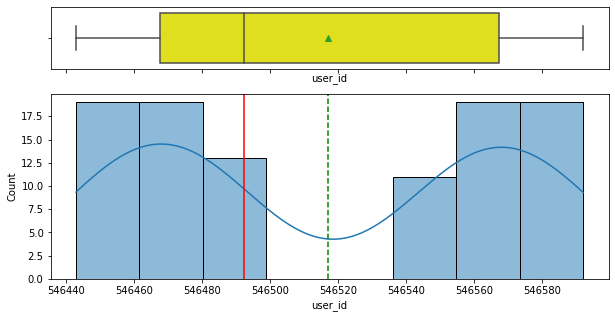

In [10]:
# plotting an histogram and a boxplot for the 'user_id'
histogram_boxplot(df, 'user_id')

#### Observations:
* Data is not normally distributed and this will need further analysis.
* It could be a normal distribution but there is this empty valley of users id around the mean.


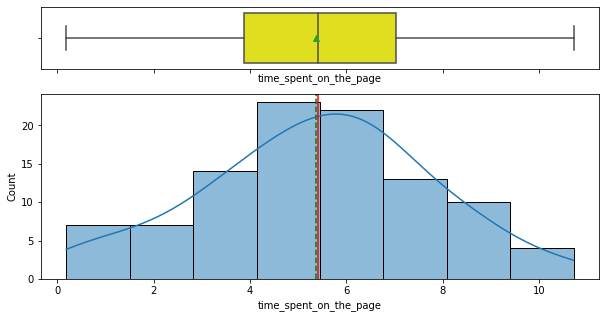

In [11]:
# plotting an histogram and a boxplot for the 'time_spent_on_the_page'
histogram_boxplot(df, 'time_spent_on_the_page')

#### Observations:
* Data normally distributed with average, mode and median around the same value.
* Most of the users spent around four to seven minutes in the landing page.

Now lets take a look at **categorical features** plotting a labeled barplot using 'labeled_barplot' function provided by Professor Kashish Kokhli.

In [12]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    
    plt.show()  # show the plot

<Figure size 720x504 with 0 Axes>

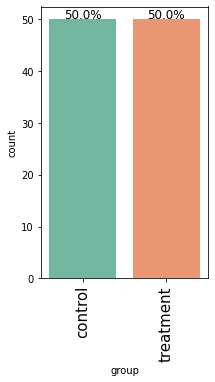

In [13]:
# adjusting the figure to 10x7 size
plt.figure(figsize=(10,7))
# plotting an labeled barplot 'group'
labeled_barplot(df, 'group', perc=True)

#### Observations:
* The data is equally distributed (50%) between `control` and `treatment` categories users in the A/B Test. 


<Figure size 720x504 with 0 Axes>

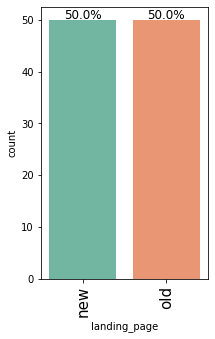

In [14]:
# adjusting the figure to 10x7 size
plt.figure(figsize=(10,7))
# plotting an labeled barplot 'landing_page'
labeled_barplot(df, 'landing_page', perc=True)

#### Observations:
* The data is equally distributed (50%) between `new` and `old` categories of landing pages 

<Figure size 720x504 with 0 Axes>

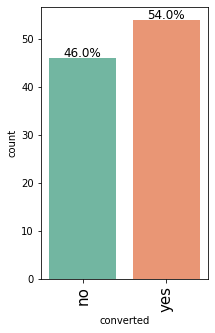

In [15]:
# adjusting the figure to 10x7 size
plt.figure(figsize=(10,7))
# plotting an labeled barplot 'converted'
labeled_barplot(df, 'converted', perc=True)

#### Observations:
* There are more users (54%) who subscribed to receive the E-news portal content. 

<Figure size 720x504 with 0 Axes>

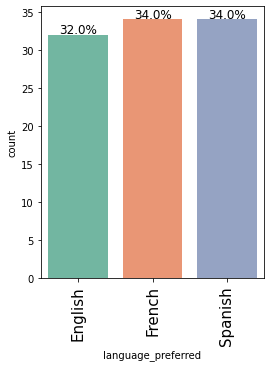

In [16]:
# adjusting the figure to 10x7 size
plt.figure(figsize=(10,7))
# plotting an labeled barplot 'language_preferred'
labeled_barplot(df, 'language_preferred', perc=True)

#### Observations:
* The data is almost equally distributed  between `English`, `French` and `Spanish` for the preferred language.
* There are a slightly less users who prefers `English` language. 


In [17]:
# Showing the crosstab() for features 'group' and 'landing_page'
ct = pd.crosstab(df['group'],df['landing_page'])
ct

landing_page,new,old
group,,
control,0,50
treatment,50,0


#### Observations:
* All `control` users are related to the `old` landing page as well as that all `treatment` users are related to the `new` landing page.
* In terms of data it is possible to say that the information is 100% correlated and in this case (sample) we could drop one of theses columns without losing understanding but saving some space.

Let's display the users who spent more and less time on the landing page.

In [18]:
# Ordering the dataset by 'time_spent_on_the_page' in descending order will cause that the first row is the user who spent more time on the landing page.
# using the function head(1) to access thar record
df.sort_values(by='time_spent_on_the_page',ascending=False).head(1)


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
8,546461,treatment,new,10.71,yes,French


#### Observations:
*  User `546461` is the user who spent more time (10.71 minutes) on the new landing page and subscribed to receive the E-news content.

In [19]:
# Ordering the dataset by 'time_spent_on_the_page' in ascending order will cause that the first row is the user who spent less time on the landing page.
# using the function head(1) to access thar record
df.sort_values(by='time_spent_on_the_page',ascending=True).head(1)


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
39,546589,control,old,0.19,no,Spanish


#### Observations:
*  User `546589` is the user who spent less time (0.19 minutes) on the old landing page and did not subscribed to receive the E-news content. 

In [20]:
print('Number of distinct users who did the A/B test: ',len(df['user_id'].unique()))

Number of distinct users who did the A/B test:  100


#### Observations:
* There are 100 distinct users who did the A/B test.
* It's possible to ensure that each row in the dataset corresponds to one distinct user A/B test. Thus, there are no user test duplicated.

### Multivariate Analysis

### Calculating the correlation and the heatmap

In this step lets use the scikit learn package to perform a preprocessing teh way categorical data as expressed so we can build a heatmap using all the features not only the numerical ones.

_Source information:_ [Encoding categorical values using scikit learn](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features)

In [21]:
# importing the preprocessing package in scikit learn
from sklearn import preprocessing

In [22]:
# creating an object for ordinal encoder which is a way to re-interpret categorical values as integer values. 
# This way is possible to calculate de correlation among all features  
enc = preprocessing.OrdinalEncoder()
# defining the categorical features to be re-interpreted using the ordina encoder
columns = ['group','landing_page','converted','language_preferred']
# filtering the dataset with only the categorical columns
X = df[columns].copy()
# fit the ordinal encoder to the filtered DataFrame
enc.fit(X)
# creating a copy of the filtered DataFrame
df_corr = df.copy()
# transforming the copy DataFrame to the encoded features only with the selected features (categorical)
# and then assigning the transformed values to the previously copied DataFrame 
df_corr[columns] = enc.transform(X)


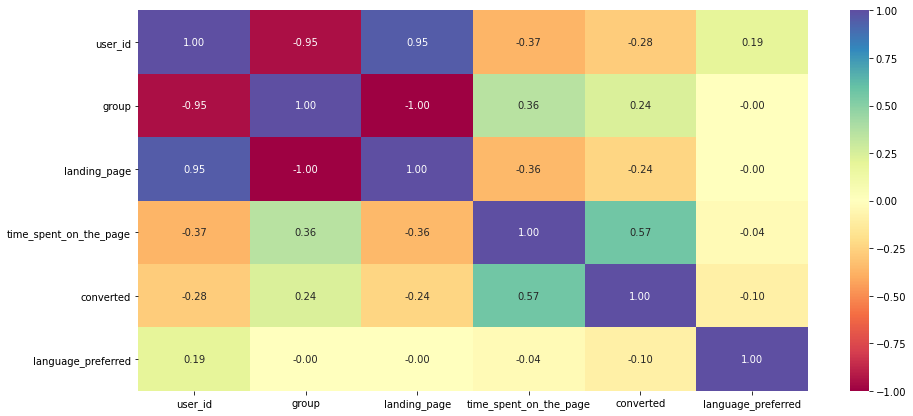

In [23]:
# calculating the correlation between pairs of columns on the preprocessed DataFrame 
corr = df_corr.corr()

# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

#### Observations:
* Pairwise correlation in the main diagonal is 1.0 because it is related to the same pair of feature.
* As we saw using Pandas crosstab() function all record that matches `landing_page == 'old'` also matches the `group == 'control'`   as well as   `landing_page == 'new'` matches when `group == 'treatment'`. That is why the correlation between than are -1.0.
* There are some correlation between `time_spent_on_the_page` and `converted` which is 0.57 in absolute value. Also there are some correlation between `group` and `converted` which is 0.24 in absolute value. That is odd and need further analysis.
* There are a correlation between `user_id` and `group`. That is odd and need further analysis.

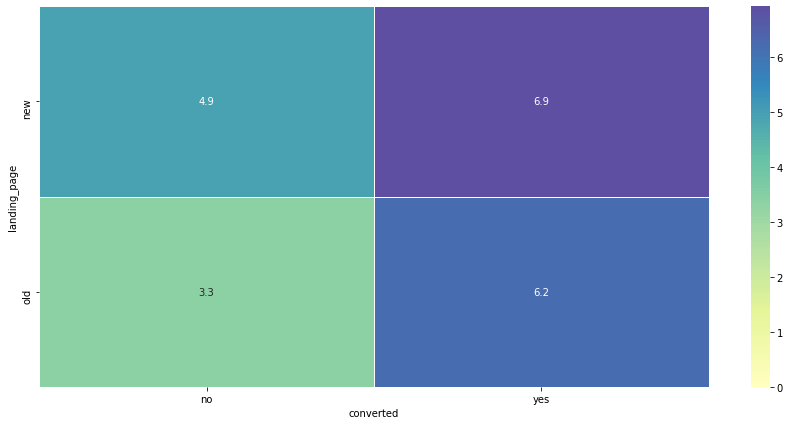

In [24]:
# Pivoting the DataFrame to prepare data to show a heatmap of 'landing_page' versus  'converted' 
# where the color of the heartmap is the 'time_spent_on_the_page'
df_hm =df.pivot_table(index = 'landing_page',columns ='converted',values ='time_spent_on_the_page')
# Draw a heatmap 
plt.figure(figsize = (15,7)) # To resize the plot. 
sns.heatmap(df_hm,  cmap='Spectral', linewidths=.5, center=0, vmin=0, annot=True)
plt.show()

#### Observations:
* In general,  more the time in the landing page greater is the number of users who subscribed to E-news Express content.
* Visually it is not possible to argue in favor of the new landing page helping in converting to more subscribers.

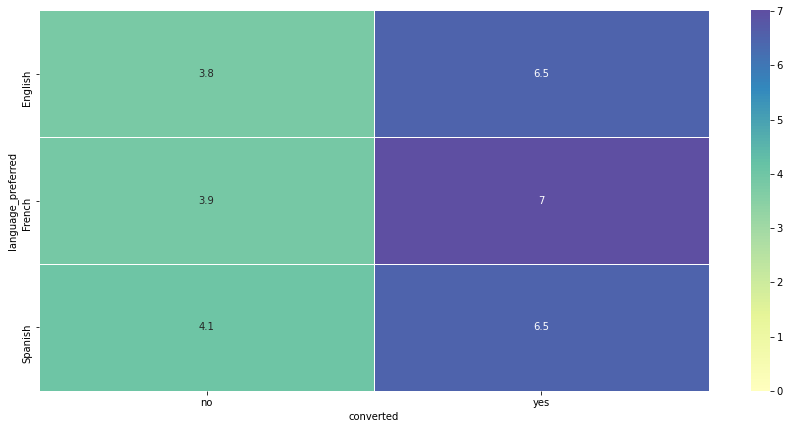

In [25]:
# Pivoting the DataFrame to prepare data to show a heatmap of 'language_preferred' versus  'converted' 
# where the color of the heartmap is the 'time_spent_on_the_page'
df_hm =df.pivot_table(index = 'language_preferred',columns ='converted',values ='time_spent_on_the_page')
# Draw a heatmap 
plt.figure(figsize = (15,7)) # To resize the plot. 
sns.heatmap(df_hm,  cmap='Spectral', linewidths=.5, center=0, vmin=0, annot=True)
plt.show()

#### Observations:
* As the previously plot, in this one, in general,  more the time in the landing page greater is the number of users who subscribed to E-news Express content.
* Visually it is not possible to argue in favor of the preferred language in converting to more subscribers.

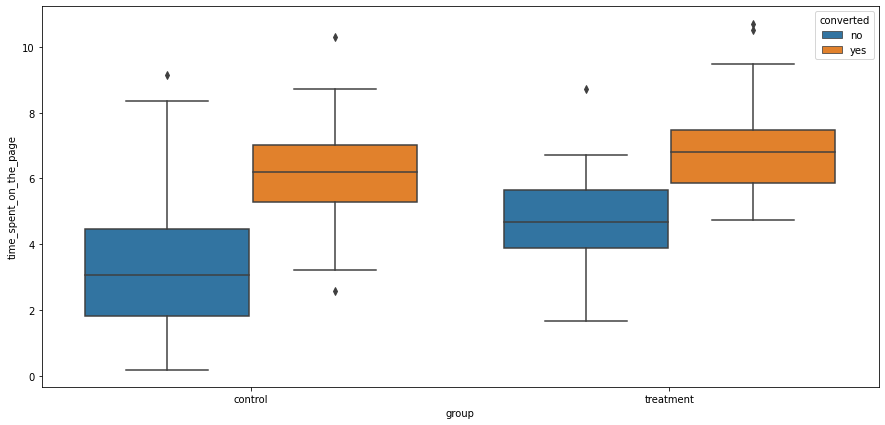

In [26]:
# Boxplot is also useful to see the distribution between two features. 
# In this case we are plotting 'language_preferred' versus 'time_spent_on_the_page'
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x ='group', y ='time_spent_on_the_page', hue='converted');

#### Observations:
* As the previously plot, in this one, in general,  more the time in the landing page greater is the number of users who subscribed to E-news Express content.
* In general it is possible to see that users spent more time on the new landing page.
* We need further analysis and statistical inference to ensure this result as true or deny it.


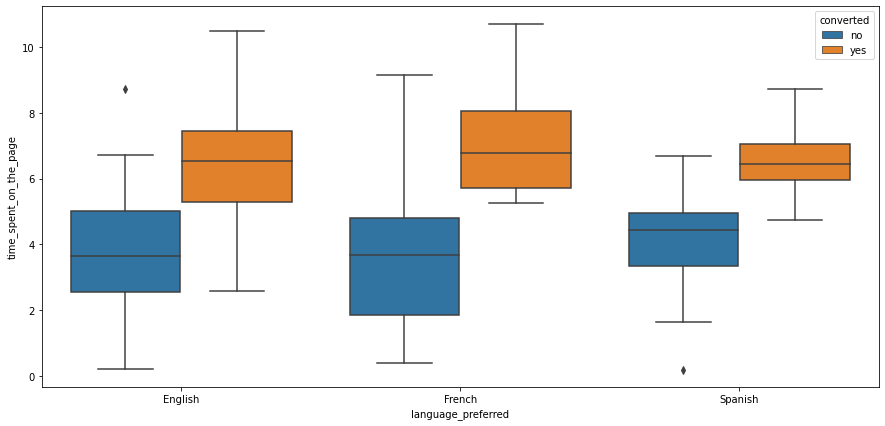

In [27]:
# Boxplot is also useful to see the distribution between two features. 
# In this case we are plotting 'language_preferred' versus 'time_spent_on_the_page'
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x ='language_preferred', y ='time_spent_on_the_page', hue='converted');

#### Observations:
* As the previously plot, in this one, in general,  more the time in the landing page greater is the number of users who subscribed to E-news Express content.
* Visually it is not possible to infer that there is a correlation on language preference and conversion on subscribing to the E-news. 
* We need further analysis and statistical inference to ensure this result as true or deny it.

<AxesSubplot:xlabel='landing_page', ylabel='user_id'>

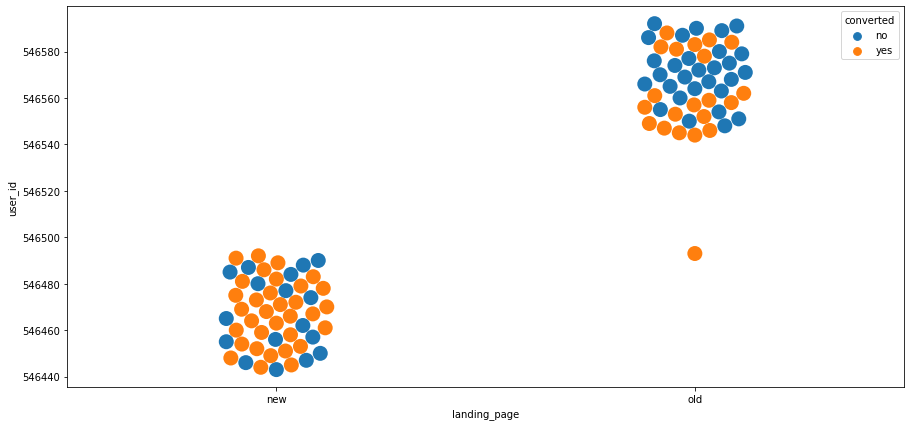

In [28]:
plt.figure(figsize=(15,7))
# swarmplot is useful to display the distribution of categorical values
# plotting 'landing_page' vs 'User_id' and colors are related to 'converted'
sns.swarmplot(data=df, x='landing_page',y='user_id', hue='converted', size=15)

#### Observations:
* Users were not sampled to access the old or new landing page. It looks like that in some point new users just accessed the new landing page.
* Another possibility is that this is dataset if from Google Analytics which provides results on how users navigates though web pages but the user's ids are just a counting number, not truly users correctly identified.
* Visually it is possible to see that are more orange points (regarding conversion on subscribing to E-news) in the new landing page rather than in the old landing page. 
* We need further analysis and statistical inference to ensure this result as true or deny it.

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

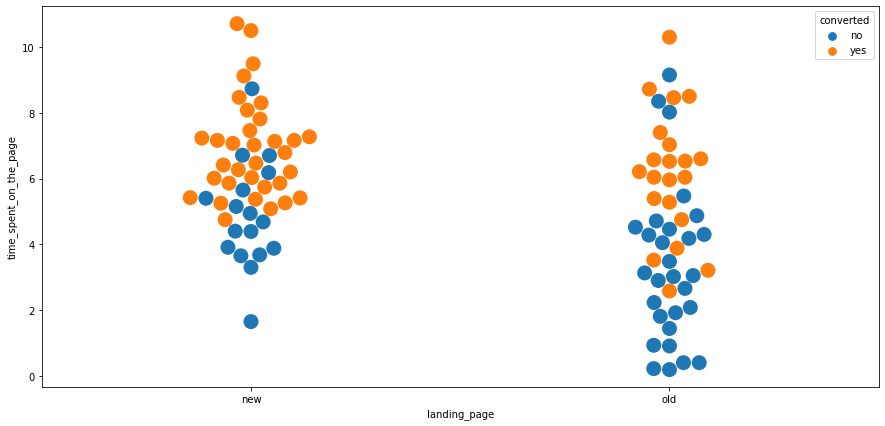

In [29]:
plt.figure(figsize=(15,7))
# swarmplot is useful to display the distribution of categorical values
# plotting 'landing_page' vs 'time_spent_on_the_page' and colors are related to 'converted'
sns.swarmplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='converted',   size=15)

#### Observations:
* Time spent on the landing page, in general, are greater on the new one.
* Again, there are more orange points regarding to conversion on the new landing page. 
* We need further analysis and statistical inference to ensure this result as true or deny it.

In [30]:
# Constructing a crosstab to use in Pie plot
piedata = pd.crosstab(df['landing_page'],df['converted'])
piedata

converted,no,yes
landing_page,,
new,17,33
old,29,21


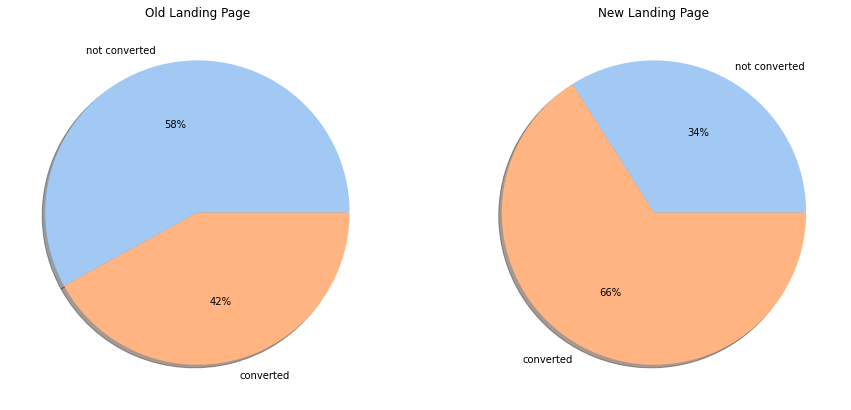

In [31]:
#define figure size
plt.figure(figsize=(15,7))
#define labels
labels = ['not converted', 'converted']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#creating subplot
plt.subplot(1, 2, 1)
#create pie chart for the 'old' 'landing_page'
plt.pie(piedata.iloc[1], labels = labels, colors = colors, autopct='%.0f%%',shadow=True)
#setting the plot title
plt.title('Old Landing Page')

plt.subplot(1, 2, 2)
#create pie chart
#create pie chart for the 'new' 'landing_page'
plt.pie(piedata.iloc[0], labels = labels, colors = colors, autopct='%.0f%%',shadow=True)
#setting the plot title
plt.title('New Landing Page')

# display the plot
plt.show()

#### Observations:
* 'Old Landing Page' pie plot shows that more users not convert, what averages, they do not subscribe to E-news Express content.
* 'New Landing Page' pie plot shows that more users convert, what averages, they do subscribe to E-news Express content.
* We need further analysis and statistical inference to ensure this result as true or deny it.

##  **<u>Inferential Analysis and Hypothesis Testing</u>**  

###  **<u>Question</u>:** Do the users spend more time on the new landing page than the old landing page?

**Step 1**: Define null and alternate hypotheses

Let's write the null and alternative hypothesis

We will test the null hypothesis

>$H_0:$ There are no significant difference in the average time spent on the new the landing page compared to the old one. 

against the alternate hypothesis

>$H_a:$ There are significant difference in the average time spent in favor of the new the landing page (more time spent) compared to the old one. 

Let $\mu_1, \mu_2$ be the average time spent on the landing page, assuming 1 as the old landing page and 2 as the new landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_2>\mu_1$

**Step 2:** Select Appropriate test

This is a problem, concerning two population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified. If not we can use the Two Independent Sample T-test for Unequal Means - Equal Std Dev 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis for the new landing page.

$H_0$ : The time spent on the page follow a normal distribution for the new landing page.

$H_a$ : The time spent on the page do not follow a normal distribution for the new landing page.

In [32]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(df[df['landing_page'] == 'new']['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the time spent on the page follow a normal distribution for the new landing page.

Now we will test the null hypothesis for the old landing page.

$H_0$ : The time spent on the page follow a normal distribution for the old landing page.

$H_a$ : The time spent on the page do not follow a normal distribution for the old landing page.

In [33]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(df[df['landing_page'] == 'old']['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.45611920952796936


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the time spent on the page follow a normal distribution for the new landing page.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [34]:
# Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(df[df['landing_page'] == 'new']['time_spent_on_the_page'], df[df['landing_page'] == 'old']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.008950671168914447


Since the p-value is smaller than the 5% significance level, we do reject the null hypothesis of homogeneity of variances.

### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent on the page is measured on a continuous scale.
* Normally distributed populations - Yes, Shapiro-Wilk’s test shows that this assumption is true.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, sample are from population of random visitors on each landing page.

**T-test assumptions are all satisfied !!!**


**Step 3:** Decide the significance level

Here, we select α= 0.05.

**Step 4:** Calculate the p-value

In [35]:
# display the average and standard deviation for time spent on the page for the new and old landing pages.
print('Average time spent on the new landing page:',df[df['landing_page'] == 'new']['time_spent_on_the_page'].mean())
print('Average time spent on the old landing page:',df[df['landing_page'] == 'old']['time_spent_on_the_page'].mean())
print('Standard deviation on time spent on the new landing page:',df[df['landing_page'] == 'new']['time_spent_on_the_page'].std())
print('Standard deviation on time spent on the old landing page:',df[df['landing_page'] == 'old']['time_spent_on_the_page'].std())

Average time spent on the new landing page: 6.2232
Average time spent on the old landing page: 4.532400000000001
Standard deviation on time spent on the new landing page: 1.8170310387878263
Standard deviation on time spent on the old landing page: 2.581974849306046


In [36]:
# find the p-value
test_stat, p_value = stats.ttest_ind(df[df['landing_page'] == 'new']['time_spent_on_the_page'], 
                                     df[df['landing_page'] == 'old']['time_spent_on_the_page'], 
                                     equal_var = False, alternative = 'greater')
print('The p-value is',p_value)


The p-value is 0.0001392381225166549


**Step 5:** Compare the p-value with $\alpha$

In [37]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


**Step 6:**  Draw inference

Since the p-value is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the users do spend more time on the new landing page.

### **<u>Question</u>:** Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

**Step 1**: Define null and alternate hypotheses

Let's write the null and alternative hypothesis

We will test the null hypothesis

>$H_0:$ The conversion rate for the new landing page is not significantly greater than the conversion rate on the old landing page. 

against the alternate hypothesis

>$H_a:$ The conversion rate for the new landing page is significantly greater than the conversion rate on the old landing page. 


**Step 2:** Select Appropriate test

In [38]:
# counting the number of visits on the new landing page that converted (signed to the receive E-news express content)
new_conv = df[(df['landing_page'] == 'new')&(df['converted'] == 'yes')].count()[0]
# counting the number of visits on the old landing page that converted (signed to the receive E-news express content)
old_conv = df[(df['landing_page'] == 'old')&(df['converted'] == 'yes')].count()[0]
# counting the total number of visits on the new landing page 
tot_new = df[df['landing_page'] == 'new'].count()[0]
# counting the total number of visits on the old landing page 
tot_old = df[df['landing_page'] == 'old'].count()[0]
# display the results
print('Total conversions on the new landing page is {} out of {} total visits'.format(new_conv,tot_new))
print('Total conversions on the old landing page is {} out of {} total visits'.format(old_conv,tot_old))

Total conversions on the new landing page is 33 out of 50 total visits
Total conversions on the old landing page is 21 out of 50 total visits


### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, people visited the old or the new landing page. The same information can be seeing on the group (control/treatment)
*   Random sampling from the population - Yes, landing page are randomly visited by internet users
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, Central Limit Theorem works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively. 

On the new landing page
>$np = 50\cdot \frac{33}{50} = 33 \geq 10 \\
n(1-p) = 50 \cdot \frac{50-33}{50} = 17 \geq 10$

On the old landing page
>$np = 50\cdot \frac{21}{50} = 21 \geq 10\\
n(1-p) = 50 \cdot \frac{50-21}{50} = 29 \geq 10$


The formulated hypotheses are concerned with proportions. A test of proportions can be used to analyse the hypotheses and draw a conclusion. We shall use a Proportions Z test for this problem.

**Z-test assumptions are all satisfied !!!** 

**Step 3:** Decide the significance level

Here, we select α= 0.05.

**Step 4:** Calculate the p-value

In [39]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# set the counts of convertion 
conv_count = np.array([new_conv, old_conv])

# set the sample sizes
nobs = np.array([tot_new, tot_old])

# find the p-value
test_stat, p_value = proportions_ztest(conv_count, nobs, alternative='larger')
print('The p-value is',p_value)

The p-value is 0.008026308204056278


**Step 5:** Compare the p-value with $\alpha$

In [40]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


**Step 6:**  Draw inference

Since the p-value is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate for the new landing page is significantly greater than the conversion rate on the old landing page.

###  **<u>Question</u>:** Does the converted status depend on the preferred language?

**Step 1**: Define null and alternate hypotheses

Let's write the null and alternative hypothesis

We will test the null hypothesis

$H_0:$ Converted status is independent of the preferred language

against the alternate hypothesis

$H_a:$ Converted status is NOT independent of the preferred language


**Step 2:** Select Appropriate test

### Let's test whether the Chi-Square Test for Independence assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample from the population of random landing pages visitors.

**Chi-Square Test for Independence assumptions are all satisfied !!!**


In [41]:
# create the crosstab with the counting values related to 'converted' and 'language_preferred'
data = pd.crosstab(df['converted'],df['language_preferred'])
data

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


**Step 3:** Decide the significance level

Here, we select α= 0.05.

**Step 4:** Calculate the p-value

In [42]:
# use chi2_contingency() to find the p-value
chi2, p_value, dof, exp_freq = stats.chi2_contingency(data)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.21298887487543447


**Step 5:** Compare the p-value with $\alpha$

In [43]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


**Step 6:**  Draw inference

Since the p-value is > 0.05, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the converted status is independent of the preferred language.

### **<u>Question</u>:** Is the mean time spent on the new page same for the different language users?

**Step 1**: Define null and alternate hypotheses

Let's write the null and alternative hypothesis

We will test the null hypothesis

>$H_0:$ There are no significant difference in the average time spent on the new the landing page for the different language users. 

against the alternate hypothesis

>$H_a:$ There are significant difference in the average time spent on the new the landing page for the different language users. 


**Step 2:** Select Appropriate test

This is a problem, concerning two population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified. If not we can use the Two Independent Sample T-test for Unequal Means - Equal Std Dev 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis for the new landing page.

$H_0$ : The time spent on the page follow a normal distribution for each of the preferred languages.

$H_a$ : The time spent on the page do not follow a normal distribution for each of the preferred languages.

In [44]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value related to the time spent on the page for each preferred language
w, p_value = stats.shapiro(df[(df['language_preferred'] == 'English')&(df['landing_page'] == 'new')]['time_spent_on_the_page']) 
print('Language preferred English, the p-value is', p_value)
w, p_value = stats.shapiro(df[(df['language_preferred'] == 'French')&(df['landing_page'] == 'new')]['time_spent_on_the_page']) 
print('Language preferred French, the p-value is', p_value)
w, p_value = stats.shapiro(df[(df['language_preferred'] == 'Spanish')&(df['landing_page'] == 'new')]['time_spent_on_the_page']) 
print('Language preferred Spanish, the p-value is', p_value)

Language preferred English, the p-value is 0.8863451480865479
Language preferred French, the p-value is 0.32137173414230347
Language preferred Spanish, the p-value is 0.09006839990615845


Since p-value for each test larger than the 5% significance level, we fail to reject the null hypothesis that the time spent on the page follow a normal distribution for each of the preferred languages.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [45]:
# Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(df[(df['language_preferred'] == 'English')&(df['landing_page'] == 'new')]['time_spent_on_the_page'],
                                  df[(df['language_preferred'] == 'French')&(df['landing_page'] == 'new')]['time_spent_on_the_page'],
                                  df[(df['language_preferred'] == 'Spanish')&(df['landing_page'] == 'new')]['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is larger then 0.05, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the One-way ANOVA test assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

**One-way ANOVA test assumptions are all satisfied !!!**

**Step 3:** Decide the significance level

Here, we select α= 0.05.

**Step 4:** Calculate the p-value

In [46]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df[(df['language_preferred'] == 'English')&(df['landing_page'] == 'new')]['time_spent_on_the_page'],
                                df[(df['language_preferred'] == 'French')&(df['landing_page'] == 'new')]['time_spent_on_the_page'],
                                df[(df['language_preferred'] == 'Spanish')&(df['landing_page'] == 'new')]['time_spent_on_the_page'])
print('The p-value is',p_value)

The p-value is 0.43204138694325955


**Step 5:** Compare the p-value with $\alpha$

In [47]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


**Step 6:**  Draw inference

Since the p-value is > 0.05, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that there are no significant difference in the average time spent on the new the landing page for the different language users. 

## **<u>Conclusion and Recommendations</u>**


### Introduction

This is a Business Analytics is composed of an Exploratory Data Analysis and a Inferential Analysis and Hypothesis Testing for an online news portal that aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Observations are described in the dataset using the following features: 

* `user_id` - This represents the user ID of the person visiting the website.
* `group` - This represents whether the user belongs to the first group (control) or the second group (treatment).
* `landing_page` - This represents whether the landing page is new or old.
* `time_spent_on_the_page` - This represents the time (in minutes) spent by the user on the landing page.
* `converted` - This represents whether the user gets converted to a subscriber of the news portal or not.
* `language_preferred` - This represents the language chosen by the user to view the landing page.

The dataset contains 6 features and 100 observations from random visitors on each landing page (old and new).

### Key Insights

**(1)** Dataset has 100 rows to evaluate the A/B test wth exactly 50 examples for each landing page (old/new).

&nbsp; &emsp; **Recommendation**: Although the results shows statistically significant it could be better if there are more examples for the sake of better insights.

**(2)** All control users are related to the old landing page as well as that all treatment users are related to the new landing page.

&nbsp; &emsp; **Recommendation**: In terms of data it is possible to say that the information is 100% correlated and in this case (sample) we could drop one of theses columns without losing understanding but saving some space.

**(3)** We have enough statistical evidence to say that the users do spend more time on the new landing page. And, Also, we have enough statistical evidence to say that the conversion rate for the new landing page is significantly greater than the conversion rate on the old landing page.

&nbsp; &emsp; **Recommendation**: The company should consider the fully use of the new landing page stead of the old one. It should consider a study on how time spent on the page is related to the conversion.

**(4)** We have enough statistical evidence to say that the converted status is independent of the preferred language. And, also, we have enough statistical evidence to say that there are no significant difference in the mean time spent on the new the landing page for the different language users.

&nbsp; &emsp; **Recommendation**: Keeping the same landing page structure, information and patches, the company would deploy the landing page on new languages.


### Conclusion

As the previously data analysis, insights and recommendations suggests there are some opportunities on conversion of new subscribers by using the new landing page.  The company should consider a further study on how time spent on the page are correlated to the conversion. Another subject of study is the  possibility to increase the conversion rate and also decrease the time spent on the new landing page.


